In [ ]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = \
    keras.datasets.fashion_mnist.load_data()

train_scaled = train_input / 255.0

train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [ ]:
model = model_fn()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss'])


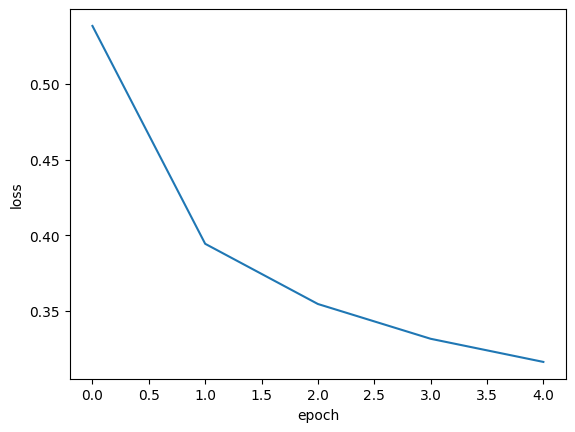

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

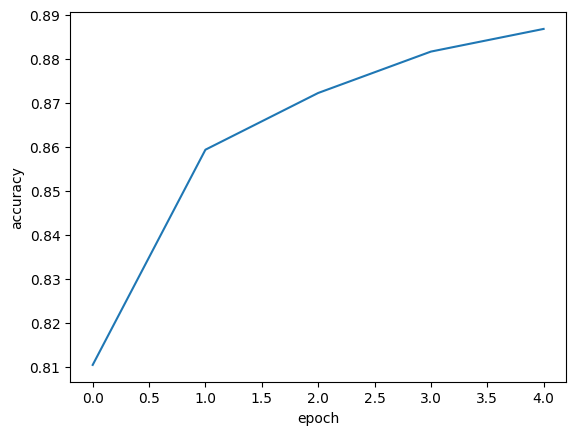

In [ ]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7633 - loss: 0.6759
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8538 - loss: 0.4037
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8687 - loss: 0.3641
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8771 - loss: 0.3419
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8857 - loss: 0.3166
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8898 - loss: 0.3036
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8970 - loss: 0.2898
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8994 - loss: 0.2849
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9027 - loss: 0.2745
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9038 - loss: 0.2754
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9071 - loss: 0.2666
Epoch 12/20
1500/1500 ━━━━━━━━

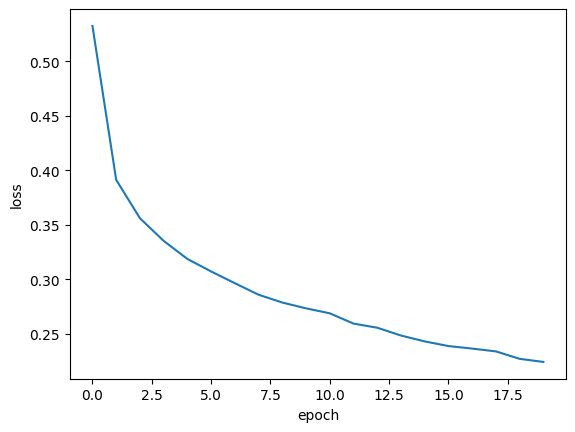

In [ ]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=1)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(train_scaled, train_target, epochs=20, verbose=2,
                    validation_data=(val_scaled, val_target))

Epoch 1/20
1500/1500 - 7s - 5ms/step - accuracy: 0.8106 - loss: 0.5338 - val_accuracy: 0.8558 - val_loss: 0.4112
Epoch 2/20
1500/1500 - 8s - 6ms/step - accuracy: 0.8580 - loss: 0.3945 - val_accuracy: 0.8677 - val_loss: 0.3735
Epoch 3/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8717 - loss: 0.3587 - val_accuracy: 0.8661 - val_loss: 0.3795
Epoch 4/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8813 - loss: 0.3340 - val_accuracy: 0.8776 - val_loss: 0.3480
Epoch 5/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8863 - loss: 0.3183 - val_accuracy: 0.8764 - val_loss: 0.3560
Epoch 6/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8900 - loss: 0.3070 - val_accuracy: 0.8781 - val_loss: 0.3546
Epoch 7/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8935 - loss: 0.2975 - val_accuracy: 0.8780 - val_loss: 0.3558
Epoch 8/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8976 - loss: 0.2895 - val_accuracy: 0.8873 - val_loss: 0.3421
Epoch 9/20
1500/1500 - 4s - 3ms/step - accuracy: 0.9000 - loss: 0.2822 - val_accuracy: 0.8813 - 

In [12]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


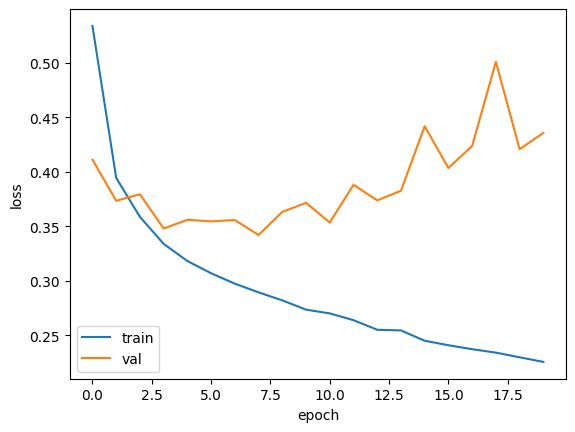

In [13]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

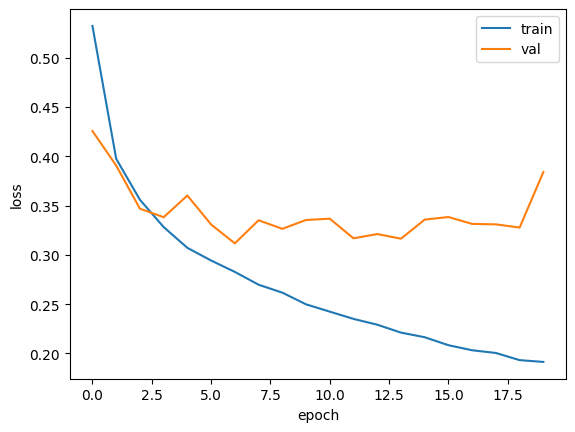

In [ ]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

history = model.fit(train_scaled, train_target, epochs = 20, verbose = 0, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [15]:
model = model_fn(keras.layers.Dropout(0.4))
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1500/1500 - 7s - 5ms/step - accuracy: 0.7837 - loss: 0.6143 - val_accuracy: 0.8462 - val_loss: 0.4315
Epoch 2/20
1500/1500 - 9s - 6ms/step - accuracy: 0.8330 - loss: 0.4657 - val_accuracy: 0.8553 - val_loss: 0.3940
Epoch 3/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8462 - loss: 0.4274 - val_accuracy: 0.8609 - val_loss: 0.3829
Epoch 4/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8524 - loss: 0.4080 - val_accuracy: 0.8648 - val_loss: 0.3661
Epoch 5/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8572 - loss: 0.3914 - val_accuracy: 0.8690 - val_loss: 0.3549
Epoch 6/20
1500/1500 - 9s - 6ms/step - accuracy: 0.8606 - loss: 0.3794 - val_accuracy: 0.8729 - val_loss: 0.3494
Epoch 7/20
1500/1500 - 6s - 4ms/step - accuracy: 0.8646 - loss: 0.3696 - val_accuracy: 0.8773 - val_loss: 0.3396
Epoch 8/20
1500/1500 - 4s - 3ms/step - accuracy: 0.8671 - loss: 0.3595 - val_accuracy: 0.8784 - val_loss: 0.3385
Epoch 9/20
1500/1500 - 5s - 3ms/step - accuracy: 0.8696 - loss: 0.3531 - val_accuracy: 0.8767 - 

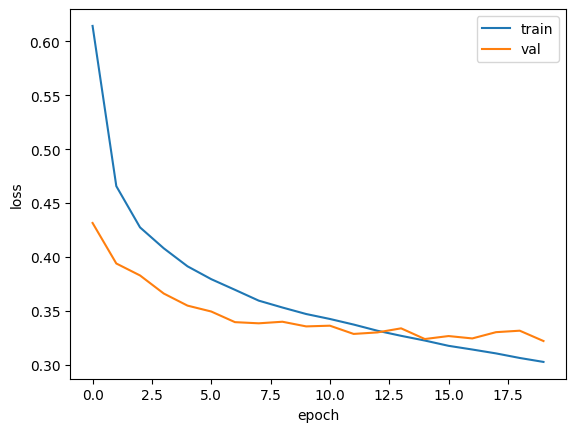

In [16]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 2, validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [20]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(train_scaled, train_target, epochs = 10, verbose = 1, validation_data = (val_scaled, val_target))

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7380 - loss: 0.7532 - val_accuracy: 0.8406 - val_loss: 0.4300
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8394 - loss: 0.4510 - val_accuracy: 0.8587 - val_loss: 0.3900
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8497 - loss: 0.4142 - val_accuracy: 0.8659 - val_loss: 0.3623
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8603 - loss: 0.3843 - val_accuracy: 0.8704 - val_loss: 0.3559
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8644 - loss: 0.3641 - val_accuracy: 0.8747 - val_loss: 0.3401
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8706 - loss: 0.3486 - val_accuracy: 0.8751 - val_loss: 0.3400
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8725 - loss: 0.3445 - val_accuracy: 0.8742 - val_loss: 0.3386
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8778 - loss: 0.3292 - 

In [24]:
model.save_weights('model.weights.h5')

In [28]:
model.save('model.whole.h5')

In [27]:
!ls -al*.h5

ls: invalid option -- '*'
Try 'ls --help' for more information.


In [29]:
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model.weights.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [35]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled, verbose = 0), axis = 1)
print(np.mean(val_labels == val_target))

0.8768333333333334


In [36]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled, verbose = 0), axis = -1)
print(np.mean(val_labels == val_target))

0.8768333333333334


In [37]:
model = keras.models.load_model('model.whole.h5')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8786 - loss: 0.3335


[0.3372155725955963, 0.8768333196640015]

In [42]:
model = model_fn(keras.layers.Dropout(0.3))

model.compile(optimizer=  'adam', loss=  'sparse_categorical_crossentropy', metrics=  ['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras',save_best_only=True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1, validation_data = (val_scaled, val_target), callbacks=[checkpoint_cb])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7292 - loss: 0.7784 - val_accuracy: 0.8454 - val_loss: 0.4311
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8372 - loss: 0.4490 - val_accuracy: 0.8513 - val_loss: 0.4011
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8554 - loss: 0.4022 - val_accuracy: 0.8630 - val_loss: 0.3769
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8601 - loss: 0.3826 - val_accuracy: 0.8735 - val_loss: 0.3461
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8622 - loss: 0.3766 - val_accuracy: 0.8705 - val_loss: 0.3549
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8689 - loss: 0.3593 - val_accuracy: 0.8780 - val_loss: 0.3393
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8752 - loss: 0.3417 - val_accuracy: 0.8796 - val_loss: 0.3354
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8738 - loss: 0.3362 

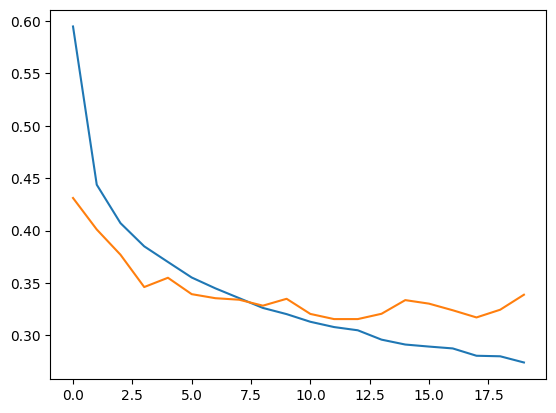

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


In [45]:
model = keras.models.load_model('best-model.keras')
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8840 - loss: 0.3191


[0.315485417842865, 0.8860833048820496]

In [58]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only = True)
early_stop = keras.callbacks.EarlyStopping(patience = 2, restore_best_weights = True)
history = model.fit(train_scaled, train_target, epochs = 20, verbose = 1,
                    validation_data = (val_scaled, val_target),
                    callbacks = [checkpoint_cb, early_stop])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7341 - loss: 0.7555 - val_accuracy: 0.8443 - val_loss: 0.4337
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8398 - loss: 0.4459 - val_accuracy: 0.8566 - val_loss: 0.3916
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8528 - loss: 0.4058 - val_accuracy: 0.8673 - val_loss: 0.3614
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8584 - loss: 0.3841 - val_accuracy: 0.8703 - val_loss: 0.3587
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8681 - loss: 0.3627 - val_accuracy: 0.8709 - val_loss: 0.3504
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.8704 - loss: 0.3519 - val_accuracy: 0.8763 - val_loss: 0.3385
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8742 - loss: 0.3457 - val_accuracy: 0.8760 - val_loss: 0.3404
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8782 - loss: 0.3288 

In [59]:
print(early_stop.stopped_epoch)

9


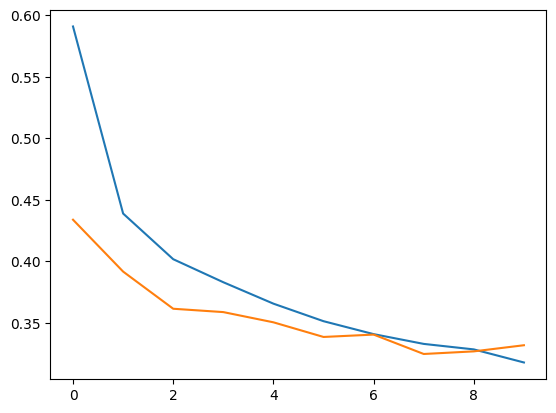

In [60]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()


In [61]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8827 - loss: 0.3247


[0.3246418535709381, 0.8809999823570251]